# Bikes

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
with pm.Model() as model_bikes:
    σ = pm.HalfNormal("σ", Y.std())
    μ = pmb.BART("μ", X, Y, m=50)
    y = pm.Normal("y", μ, σ, observed=Y)
    idata_bikes = pm.sample(random_seed=RANDOM_SEED)

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 49 seconds.


In [5]:
idata_bikes

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [6]:
az.summary(idata_bikes)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
μ[0]     11.033  28.745  -44.714   61.917      2.833    2.009     104.0   
μ[1]      4.348  26.888  -47.160   54.910      2.638    1.870     102.0   
μ[2]    140.012  31.571   81.222  199.776      5.438    3.955      35.0   
μ[3]    137.129  27.587   85.052  186.370      2.502    1.773     123.0   
μ[4]    128.566  32.734   69.105  193.769      7.177    5.416      21.0   
...         ...     ...      ...      ...        ...      ...       ...   
μ[344]  170.782  31.508  109.427  229.721      5.227    3.726      37.0   
μ[345]   91.157  31.415   29.975  150.201      2.782    2.001     128.0   
μ[346]  264.751  33.603  201.913  327.086      5.442    3.950      38.0   
μ[347]  243.830  32.775  177.972  299.882      4.689    3.436      47.0   
σ       110.124   4.686  100.773  118.664      0.264    0.187     314.0   

        ess_tail  r_hat  
μ[0]       353.0   1.02  
μ[1]       273.0   1.02  
μ[2]       138.0   1.07  
μ[3]       433.0   1.01  
μ[4]        80.0   1.10  
...          ...    ...  
μ[344]     215.0   1.06  
μ[345]     168.0   1.02  
μ[346]     144.0   1.09  
μ[347]     122.0   1.06  
σ         1145.0   1.01  

[349 rows x 9 columns]

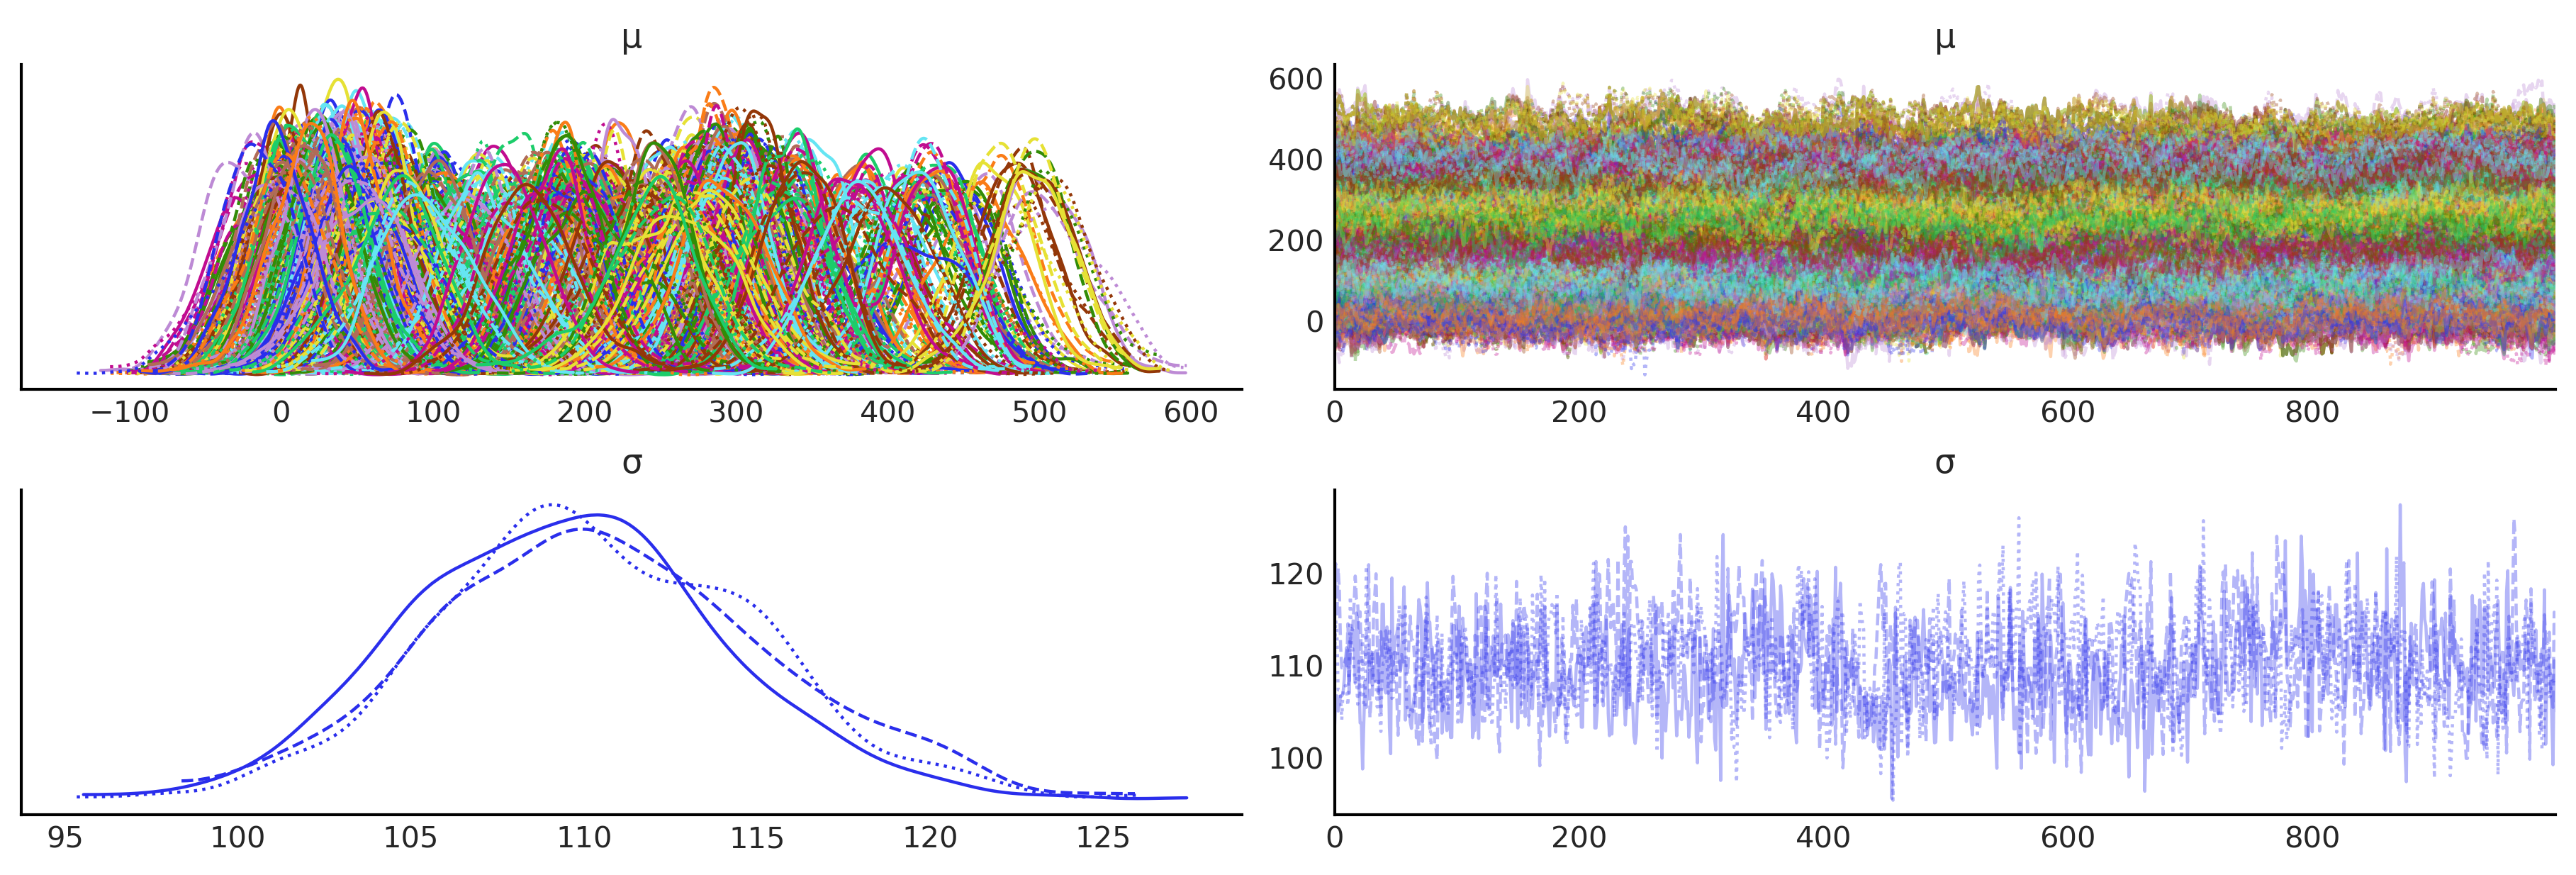

In [7]:
az.plot_trace(idata_bikes)
plt.savefig("trace_bikes.png", bbox_inches="tight");

### Partial dependence plots

/home/pablo/Programas/arviz/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/pablo/Programas/arviz/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/pablo/Programas/arviz/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/pablo/Programas/arviz/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently int

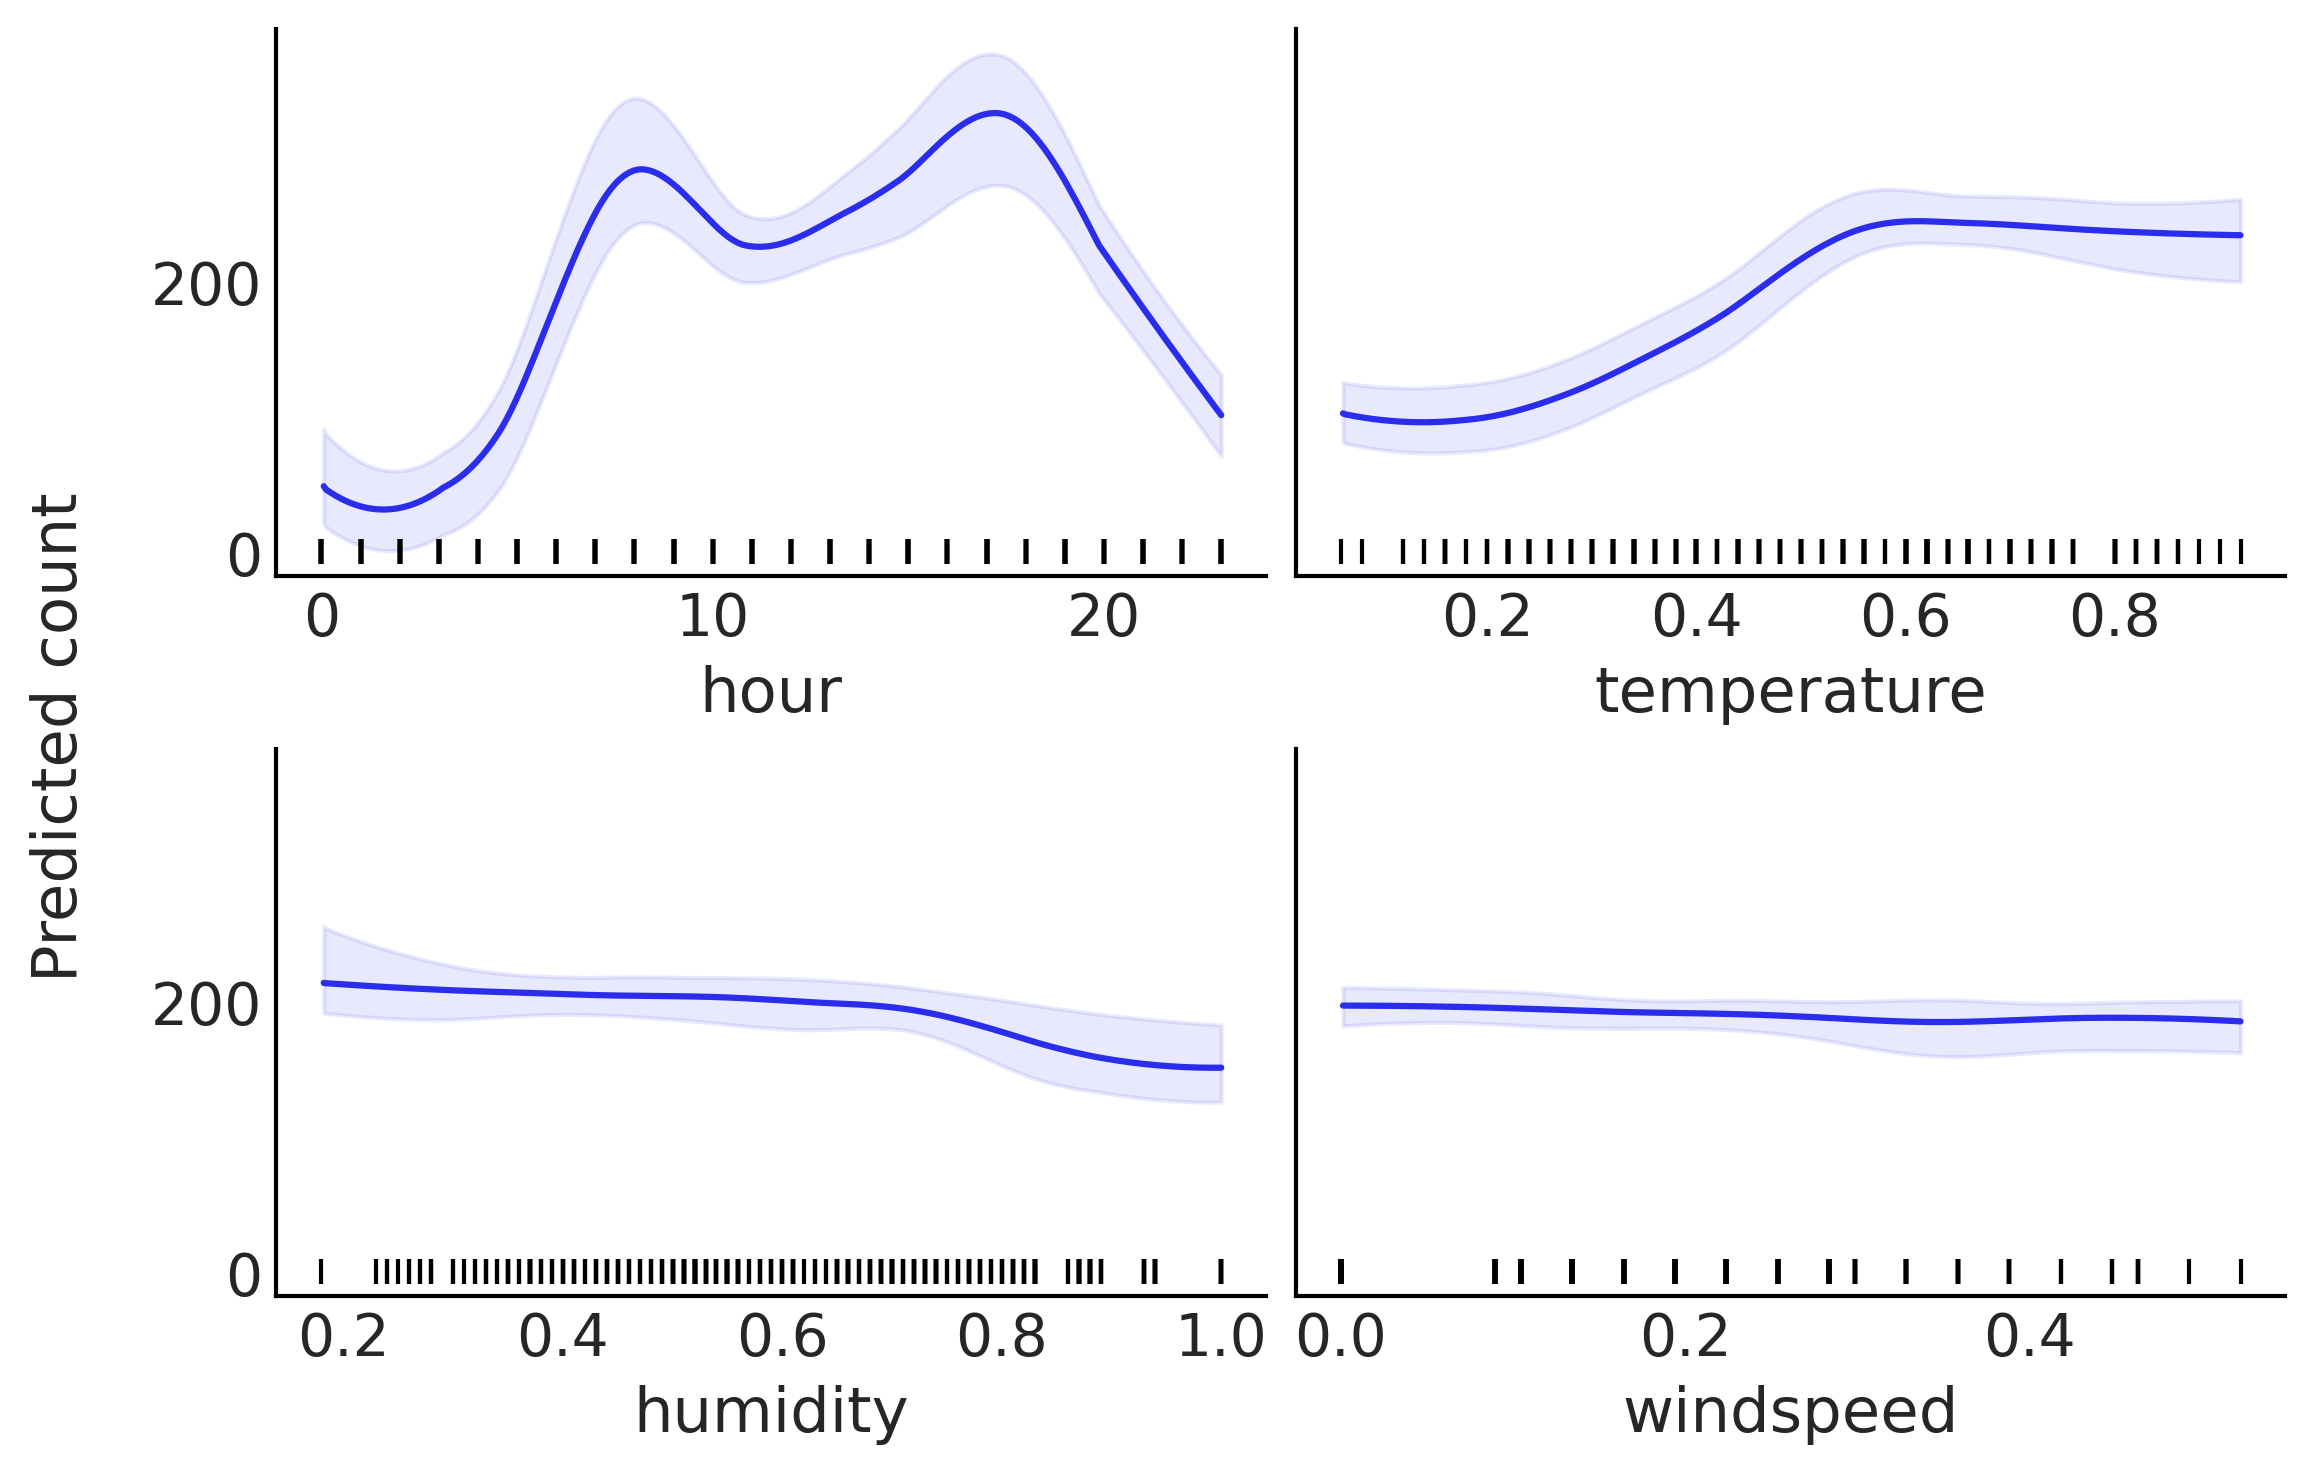

In [10]:
pmb.plot_dependence(idata_bikes, X=X, Y=Y, grid=(2, 2))
plt.savefig("partial_dependence_plot_bikes.png", bbox_inches="tight");

### Variable importance

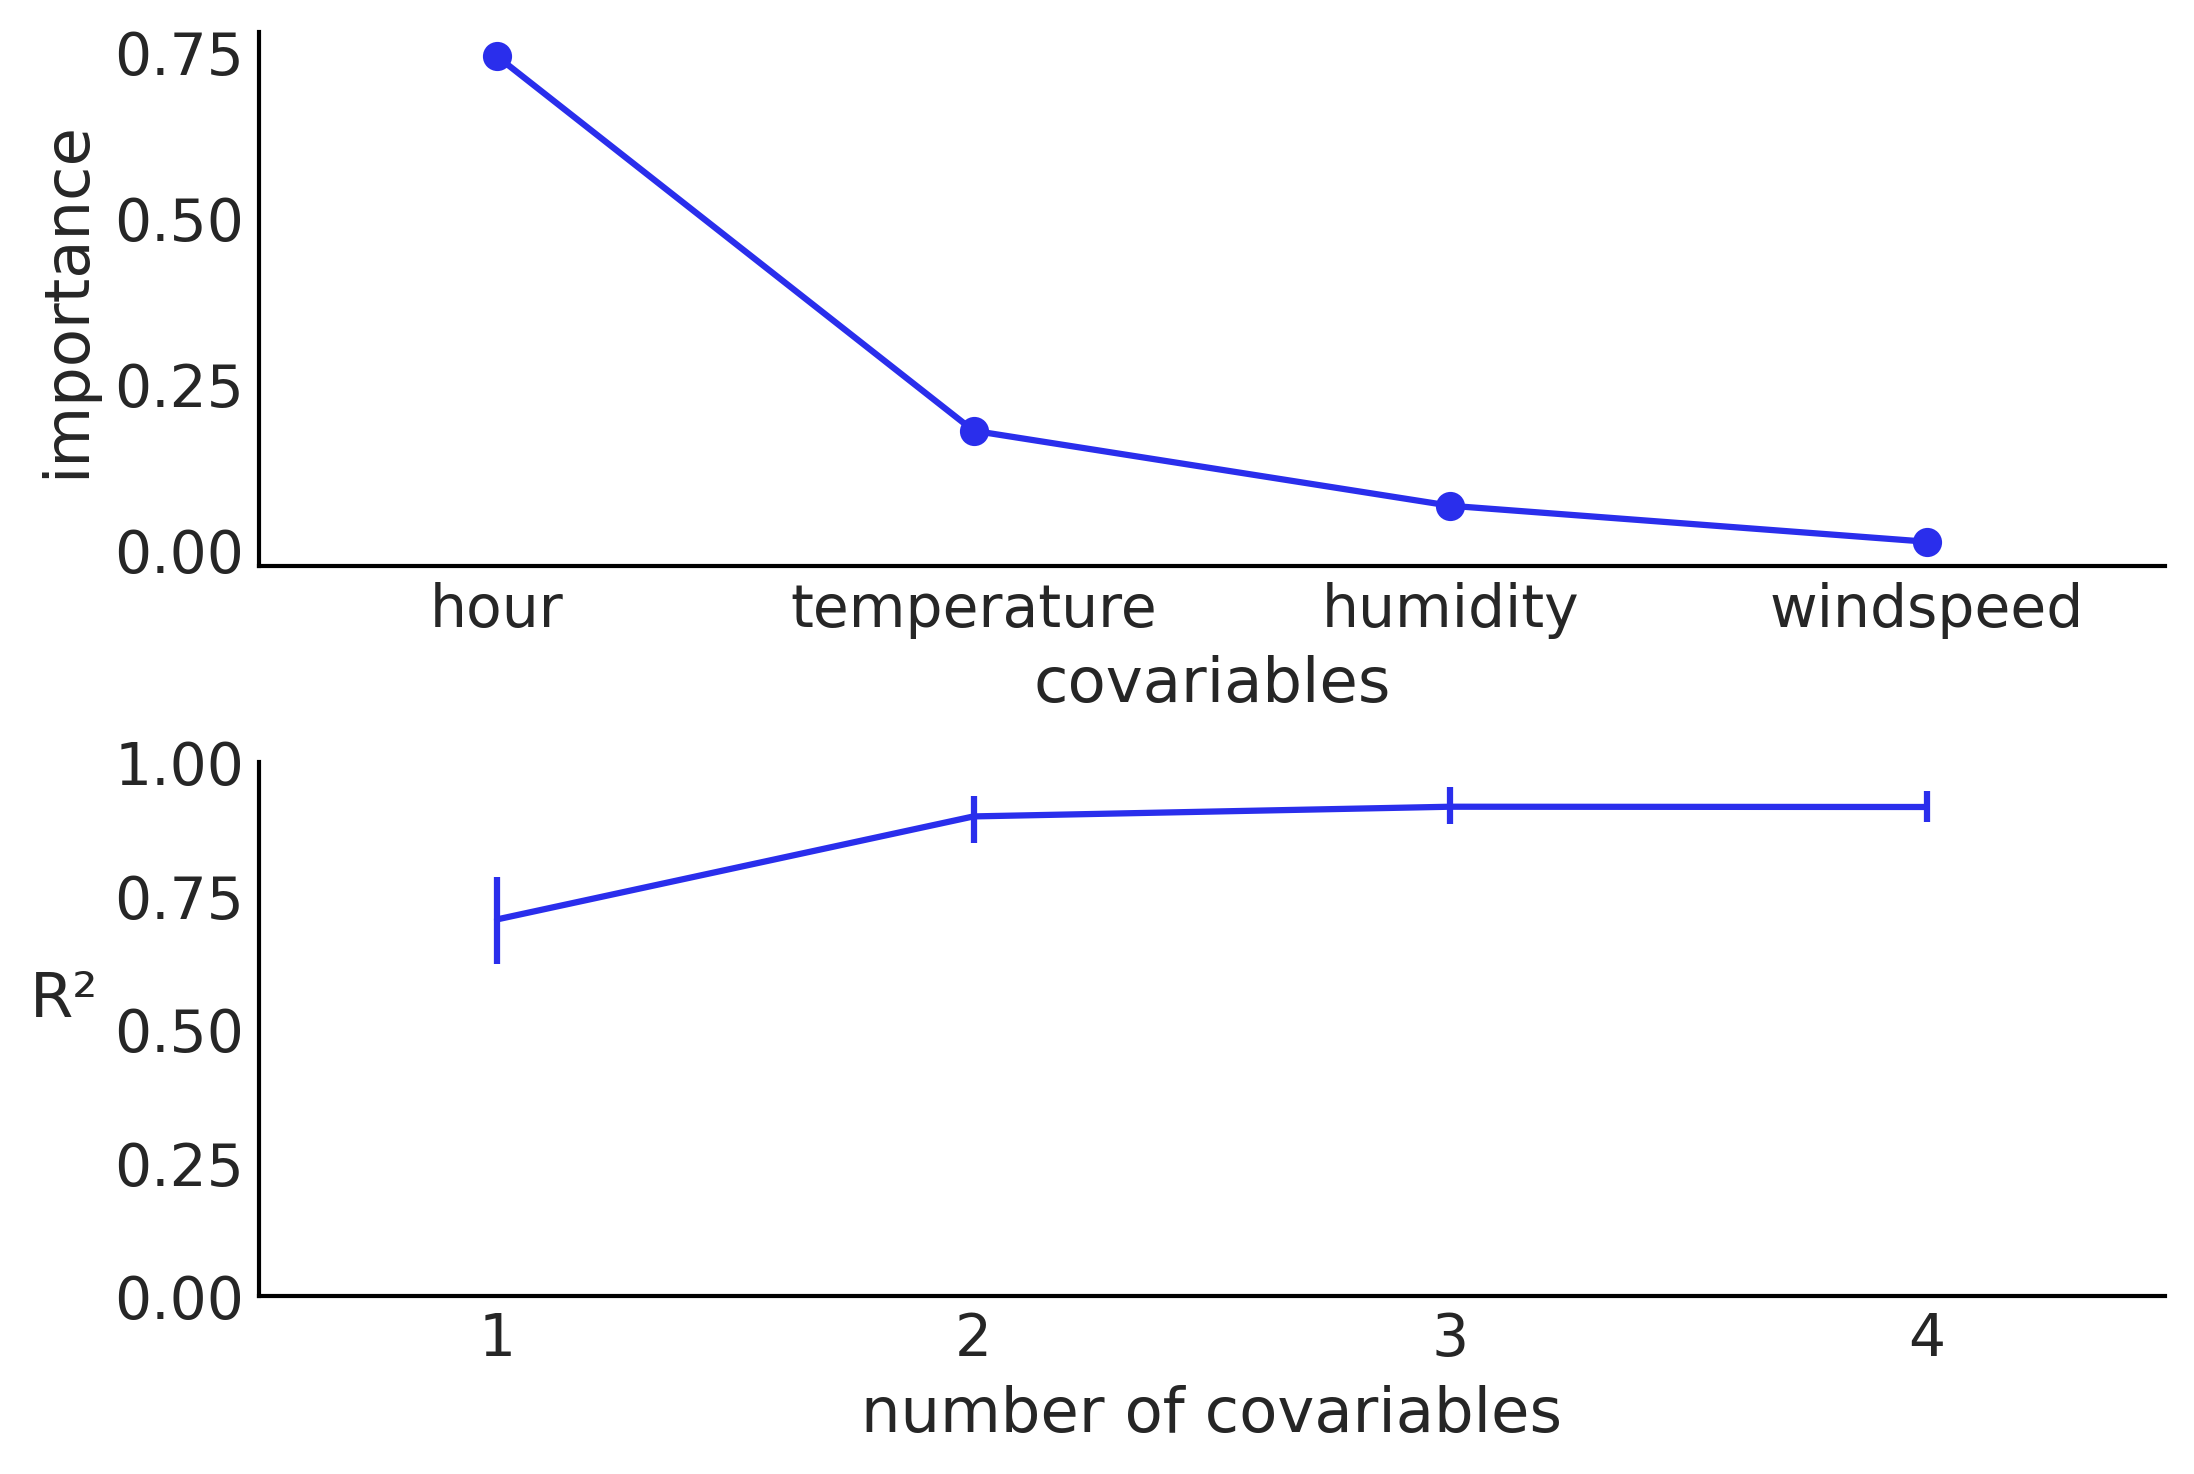

In [11]:
labels = ["hour", "temperature", "humidity", "windspeed"]
pmb.utils.plot_variable_importance(idata_bikes, X.values, labels, samples=100)
plt.savefig("bikes_VI-correlation.png");